In [128]:
import numpy as np
import pandas as pd

In [129]:
df = pd.read_csv('email.csv')

In [130]:
df.head(10)

,srno,name,mail_address,subject,department,content
0,1,Suresh Varma,suresh.v12.@gmail.com,issue with current month's bill,Billing Department,There has been an issue with my current month'...
1,2,Sanvi Sharma,sharmasanvi.34@gmail.com,what is the current price of the product,Sales Department,I'm interested in purchasing product X and I w...
2,3,Prisha Lal,lal.P09@gmail.com,vacancy to join as a Distributor,HR Department,I would like to join this company as a distrib...
3,4,Arjun Arya,aryaarjun1@gmail.com,kindly provide my records held in the company,Financial aacounting Department,due to my financial planning I require all th...
4,5,Ira Williams,iraw93@gmail.com,There is an issue with my online account in th...,Maintenance Department,iam facing issues with my account . I couldn’t...
5,6,Harshit Das,dasH892@gmail.com,Looking for collabrations and promotional even...,Marketing Department,I have been your loyal customer since years an...
6,7,Kavya Iyer,kavz62@gmail.com,Request for Operational Support and Efficiency...,Operational management,expecting for the following service (Timely or...
7,8,Zafar Khan,khanZ65@gmail.com,feedback for the operational,Management Deprartment,the service can be improved for the customers ...
8,9,Aarya Kumar,aaryak1@gmail.com,looking for the job vacancies,HR Department,I have shared my resume in the email for the ...
9,10,Ishaan Anand,ishaananand@gmail.com,looking for the home delivery of the product.,Sales Department,I found that your product isnt available in al...


In [131]:
df.shape

(10, 6)

## 1. Data Cleaning

In [132]:
# drop last 3 cols
df.drop(columns=['name','mail_address'],inplace=True)

In [133]:
df.head(10)

,srno,subject,department,content
0,1,issue with current month's bill,Billing Department,There has been an issue with my current month'...
1,2,what is the current price of the product,Sales Department,I'm interested in purchasing product X and I w...
2,3,vacancy to join as a Distributor,HR Department,I would like to join this company as a distrib...
3,4,kindly provide my records held in the company,Financial aacounting Department,due to my financial planning I require all th...
4,5,There is an issue with my online account in th...,Maintenance Department,iam facing issues with my account . I couldn’t...
5,6,Looking for collabrations and promotional even...,Marketing Department,I have been your loyal customer since years an...
6,7,Request for Operational Support and Efficiency...,Operational management,expecting for the following service (Timely or...
7,8,feedback for the operational,Management Deprartment,the service can be improved for the customers ...
8,9,looking for the job vacancies,HR Department,I have shared my resume in the email for the ...
9,10,looking for the home delivery of the product.,Sales Department,I found that your product isnt available in al...


In [134]:
df['content']=df['subject']+df['content']

In [135]:
# renaming the cols
df.rename(columns={'department':'target','content':'text'},inplace=True)
df.sample(5)

labels=[]
for lab in df['target']:
    labels.append(lab)

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [137]:
df['target'] = encoder.fit_transform(df['target'])

In [166]:
df.head(10)

,srno,subject,target,text,num_characters,num_words,num_sentences
0,1,issue with current month's bill,0,issue with current month's bill There has been...,134,27,1
1,2,what is the current price of the product,7,what is the current price of the productI'm in...,105,20,1
2,3,vacancy to join as a Distributor,2,vacancy to join as a DistributorI would like t...,99,19,1
3,4,kindly provide my records held in the company,1,kindly provide my records held in the companyd...,169,27,1
4,5,There is an issue with my online account in th...,3,There is an issue with my online account in th...,135,30,2
5,6,Looking for collabrations and promotional even...,5,Looking for collabrations and promotional even...,168,27,1
6,7,Request for Operational Support and Efficiency...,6,Request for Operational Support and Efficiency...,199,27,1
7,8,feedback for the operational,4,feedback for the operational the service can b...,107,17,1
8,9,looking for the job vacancies,2,looking for the job vacancies I have shared my...,121,24,1
9,10,looking for the home delivery of the product.,7,looking for the home delivery of the product.I...,214,39,1


In [139]:
# missing values
df.isnull().sum()

srno       0
subject    0
target     0
text       0
dtype: int64

In [140]:
# check for duplicate values
df.duplicated().sum()

0

In [141]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [142]:
df.duplicated().sum()

0

In [143]:
df.shape

(10, 4)

## 2.EDA

In [144]:
df.head()

,srno,subject,target,text
0,1,issue with current month's bill,0,issue with current month's bill There has been...
1,2,what is the current price of the product,7,what is the current price of the productI'm in...
2,3,vacancy to join as a Distributor,2,vacancy to join as a DistributorI would like t...
3,4,kindly provide my records held in the company,1,kindly provide my records held in the companyd...
4,5,There is an issue with my online account in th...,3,There is an issue with my online account in th...


In [145]:
df['target'].value_counts()

target
7    2
2    2
0    1
1    1
3    1
5    1
6    1
4    1
Name: count, dtype: int64

['Billing Department', 'Sales Department', 'HR Department ', 'Financial aacounting Department', 'Maintenance Department ', 'Marketing Department', 'Operational management', 'Management Deprartment ', 'HR Department ', 'Sales Department']


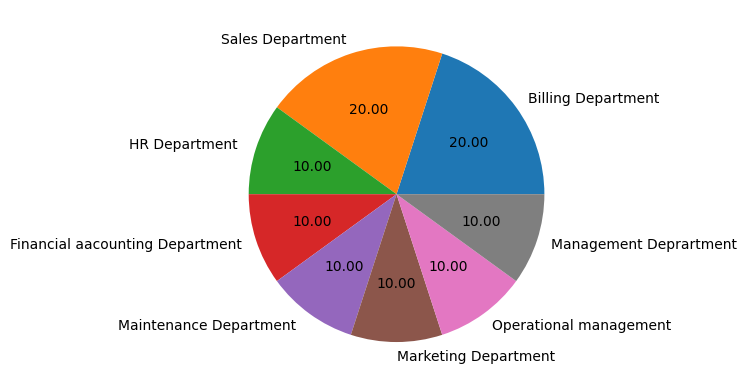

In [146]:
print(labels)

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Billing Department', 'Sales Department', 'HR Department ', 'Financial aacounting Department', 'Maintenance Department ', 'Marketing Department', 'Operational management', 'Management Deprartment '],autopct="%0.2f")
plt.show()

In [147]:
# Data is imbalanced

In [148]:
import nltk

In [149]:
!pip install nltk

In [150]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/paramgroup-
[nltk_data]     india/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
df['num_characters'] = df['text'].apply(len)

In [152]:
df.head()

,srno,subject,target,text,num_characters
0,1,issue with current month's bill,0,issue with current month's bill There has been...,134
1,2,what is the current price of the product,7,what is the current price of the productI'm in...,105
2,3,vacancy to join as a Distributor,2,vacancy to join as a DistributorI would like t...,99
3,4,kindly provide my records held in the company,1,kindly provide my records held in the companyd...,169
4,5,There is an issue with my online account in th...,3,There is an issue with my online account in th...,135


In [153]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/paramgroup-
[nltk_data]     india/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [155]:
df.head()

,srno,subject,target,text,num_characters,num_words
0,1,issue with current month's bill,0,issue with current month's bill There has been...,134,27
1,2,what is the current price of the product,7,what is the current price of the productI'm in...,105,20
2,3,vacancy to join as a Distributor,2,vacancy to join as a DistributorI would like t...,99,19
3,4,kindly provide my records held in the company,1,kindly provide my records held in the companyd...,169,27
4,5,There is an issue with my online account in th...,3,There is an issue with my online account in th...,135,30


In [156]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [157]:
df.head()

,srno,subject,target,text,num_characters,num_words,num_sentences
0,1,issue with current month's bill,0,issue with current month's bill There has been...,134,27,1
1,2,what is the current price of the product,7,what is the current price of the productI'm in...,105,20,1
2,3,vacancy to join as a Distributor,2,vacancy to join as a DistributorI would like t...,99,19,1
3,4,kindly provide my records held in the company,1,kindly provide my records held in the companyd...,169,27,1
4,5,There is an issue with my online account in th...,3,There is an issue with my online account in th...,135,30,2


In [158]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10.000000,10.000000,10.000000
mean,145.100000,25.700000,1.100000
std,40.467957,6.307843,0.316228
min,99.000000,17.000000,1.000000
25%,110.500000,21.000000,1.000000
50%,134.500000,27.000000,1.000000
75%,168.750000,27.000000,1.000000
max,214.000000,39.000000,2.000000


In [159]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1.0,1.0,1.0
mean,134.0,27.0,1.0
std,NaN,NaN,NaN
min,134.0,27.0,1.0
25%,134.0,27.0,1.0
50%,134.0,27.0,1.0
75%,134.0,27.0,1.0
max,134.0,27.0,1.0


In [160]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1.0,1.0,1.0
mean,169.0,27.0,1.0
std,NaN,NaN,NaN
min,169.0,27.0,1.0
25%,169.0,27.0,1.0
50%,169.0,27.0,1.0
75%,169.0,27.0,1.0
max,169.0,27.0,1.0


In [161]:
import seaborn as sns

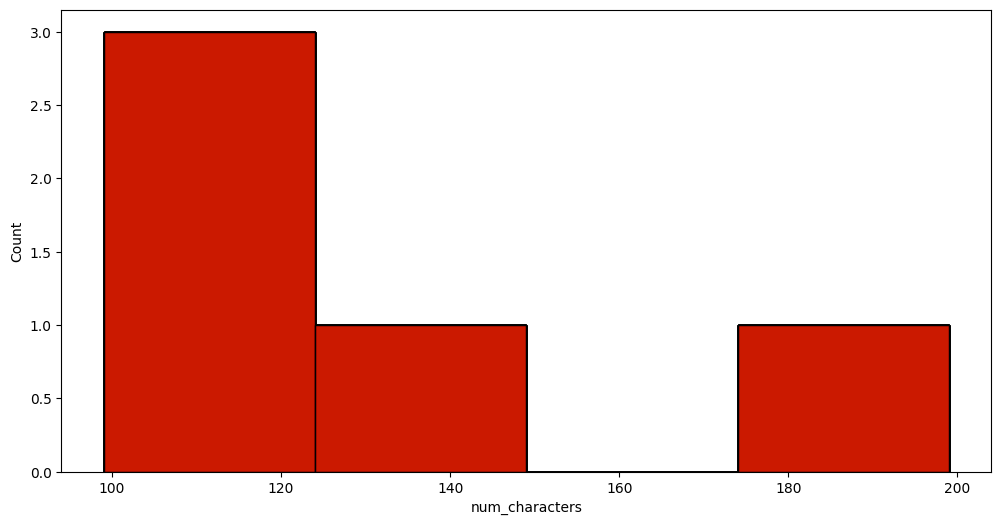

In [162]:
plt.figure(figsize=(12,6))
for i in range(8):

    sns.histplot(df[df['target']%2== 0]['num_characters'],color='green')
    sns.histplot(df[df['target'] %2!= 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

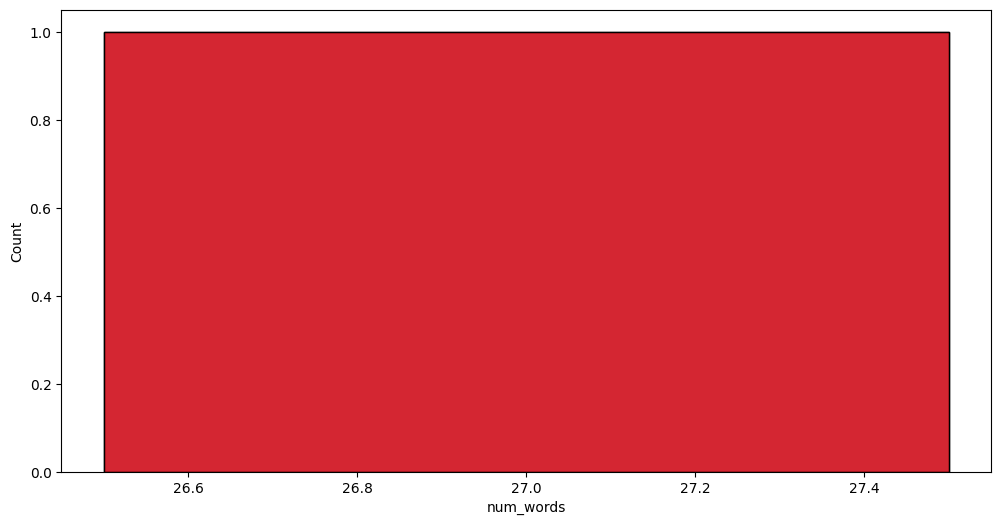

In [163]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


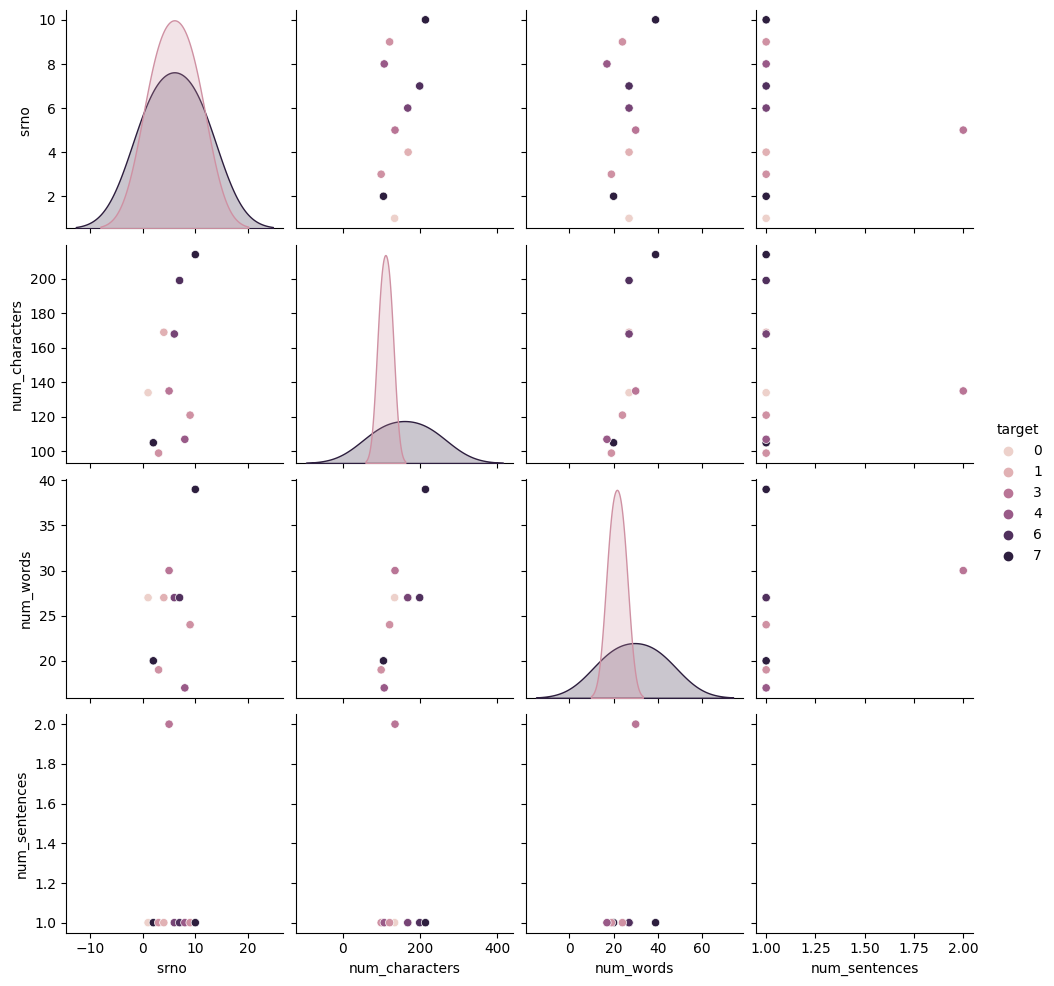

In [164]:
sns.pairplot(df,hue='target')

In [165]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: "issue with current month's bill "

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()

In [ ]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
df['text'][7]

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

In [ ]:
# ['Billing Department', 'Sales Department', 'HR Department ', 'Financial aacounting Department', 'Maintenance Department ', 'Marketing Department', 'Operational management', 'Management Deprartment ']

bd_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        bd_corpus.append(word)

sd_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        sd_corpus.append(word)

hrd_corpus = []
for msg in df[df['target'] == 2]['transformed_text'].tolist():
    for word in msg.split():
        hrd_corpus.append(word)

fad_corpus = []
for msg in df[df['target'] == 3]['transformed_text'].tolist():
    for word in msg.split():
        fad_corpus.append(word)
        

In [ ]:
len(bd_corpus)

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(bd_corpus).most_common(30))[0],y=pd.DataFrame(Counter(bd_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
len(hrd_corpus)

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(hrd_corpus).most_common(30))[0],y=pd.DataFrame(Counter(hrd_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='micro'))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='micro'))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='micro'))

In [ ]:
 # 1. preprocess
transformed_sms = transform_text('I would like to join this company as a distributor for the product.')
# 2. vectorize
vector_input = tfidf.transform([transformed_sms])
# 3. predict
result = bnb.predict(vector_input)[0]
print("Result===>", result)
# 4. Display
prob = bnb.predict_proba(vector_input)[0][1]

In [ ]:
# tfidf --> MNB

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [ ]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [ ]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [ ]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
# performance_df

In [ ]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
# performance_df1

In [ ]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
# new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [ ]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
# voting.fit(X_train,y_train)

In [ ]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

In [ ]:
# from sklearn.ensemble import StackingClassifier

In [ ]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))